**Library Imports:**

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import DBSCAN, KMeans

**Data Imports:**

In [127]:
df = pd.read_csv('data/Socioeconomic Data/Socioeconomic determinants/socioeconomic determinant for state.csv')
df_2 = pd.read_csv('data/csse_covid_19_daily_reports_us/12-31-2020.csv')
unemp_covid_df = pd.read_csv('data/yun_data/output/unemployment_covid_2020.csv')
covid_df = pd.read_csv('data/yun_data/output/covid_monthly_2020.csv')
df3 = pd.read_csv('data/yun_data/output/unemp_rate_2020.csv')
df4 = pd.read_csv('data/yun_data/output/cov_unemp_summary.csv')
df5 = pd.read_csv('data/yun_data/output/covid_socio_2020.csv')

In [128]:
#set panda options to max display to view all columns:
pd.options.display.max_columns = None

## Modeling:

For modeling purposes, since we don't necessarily have an output that we are either classifying or predicting, we have elected to utilize unsupervised modeling through clustering. The advantages of using clustering will be to identify groups that exist within our data and try and distinguish any identifying features that supports our conclusions discovered through EDA. Clustering in genreal attempts to group observations (data) with the notion that clusters of the same group are more similar than clusters of a different group. Ideally we would like to create two or three clusters that will allow us to draw comparisons easier and filter out any trends that would influence our recommendations given to the Covid resource agency. For clustering methods we will explore KMeans and DBSCAN. 

### DBSCAN

DBSCAN pictures from: https://git.generalassemb.ly/DSIR-20201214-E/lesson-dbscan

<img src='./assets/DBSCAN.png'>

DBSCAN is somewhat limited when it comes to clustering observations that may not be overly distinct in separation. So for something as complex as states it will be challenging, but we should be able to at least create some degree of clusters that will provide us some intel on where to best allocate some of sources. Using our findings from our EDA let's create a feature dataframe for some of the determinants that we noticed to be features of possible concern. 

In [129]:
features=pd.DataFrame(df5[['Median household income', 'Poverty rate', 'hospital', 
                       'White Population', 'Africa-American Population',
                       'Hispanic population', 'Deaths',
                       'Case_Fatality_Ratio', 'deaths_per_population',
                      'confirmed_per_population', 'unemp_year_rate']])

In [130]:
#Since many of these metrics are measured on varying scales, it's important to standardized our data:
ss = StandardScaler()
X_scaled = ss.fit_transform(features)

Another challenge of DBSCAN is tuning the parameters. Through some trial and error we were able to estanlish our epsilon along with the min_samples so that it would give us 4 total clusters. It's important to note that DBSCAN will also determine a 'noise' cluster denoted as -1, so when analyzing the results, we should drop that column.

In [131]:
#instantiating and setting the model paramters:
dbscan = DBSCAN(eps=2.2, min_samples=3)

#fitting the model to our scaled data:
dbscan.fit(X_scaled)

#creating a cluster column with the labels that our model was able to create:
features['cluster'] = dbscan.labels_

Next we will want to groupby our clusters to examine the mean values across our two clusters. Hopefully we will be able to uncover some distinctions between the two clusters that will provide support for our final recommendations. Don't forget to drop the noise column! 

In [132]:
features.groupby('cluster').mean().T.drop(columns=-1)

cluster,0,1,2
Median household income,62974.718750,62865.250000,83475.666667
Poverty rate,11.846875,12.300000,9.533333
hospital,101.375000,223.500000,83.000000
White Population,83.756250,78.450000,75.833333
Africa-American Population,10.243750,15.300000,12.733333
Hispanic population,7.778125,14.250000,16.733333
Deaths,3497.593750,17154.000000,12486.666667
Case_Fatality_Ratio,1.297728,2.109361,3.509479
deaths_per_population,0.000834,0.001244,0.001876
confirmed_per_population,0.065681,0.060246,0.055360


**Findings:** Judging by the clusters we have created we can see that there are a couple of notable differences among each pocket. Consistent with our EDA we notice that across each cluster, as CFR rises, so do the minority populations, while inversely the white population percentage decreases. It is also worth pointing out that there is a similar trend with deaths per capita, once again supporting what we saw with the correlational EDA analysis we performed earlier. While the clustering method is far from perfect, this should be enough to let us draw a conclusion that covid, particularly CFR and deaths per capita, disproportionately affect minority communities at a concerning rate. 

For exploratory sake let's take a look at the same features but with different parameters:

In [133]:
features_2 = features.copy()
ss = StandardScaler()
X_scaled_2 = ss.fit_transform(features_2)

In [134]:
#instantiating and setting the model paramters:
dbscan_2 = DBSCAN(eps=2.5, min_samples=2)

#fitting the model to our scaled data:
dbscan_2.fit(X_scaled_2)

#creating a cluster column with the labels that our model was able to create:
features_2['cluster'] = dbscan_2.labels_

In [135]:
features_2.groupby('cluster').mean().T.drop(columns=-1)

cluster,0,1,2,3
Median household income,62974.718750,83475.666667,62865.250000,48432.500000
Poverty rate,11.846875,9.533333,12.300000,19.300000
hospital,101.375000,83.000000,223.500000,164.500000
White Population,83.756250,75.833333,78.450000,61.450000
Africa-American Population,10.243750,12.733333,15.300000,36.150000
Hispanic population,7.778125,16.733333,14.250000,4.200000
Deaths,3497.593750,12486.666667,17154.000000,6137.500000
Case_Fatality_Ratio,1.297728,3.509479,2.109361,2.296607
deaths_per_population,0.000834,0.001876,0.001244,0.001610
confirmed_per_population,0.065681,0.055360,0.060246,0.070166


**Findings:** Even with this different clustering we can still see a similar trend in disproportions across racial demogrpahics. With higher CFR rates we see a trending of increasing minority populations whereas the white populations are still negatively correlated. Again, with a different clustering we are still seeing the trends that we have suspected throughout our EDA and our first modeling attempts.  

To help us be a bit more specific with our recommendations, let's apply these cluster labels to our original dataframes and identify states that fall in the more "affected" clusters 1 & 2 (from our first model). 

In [136]:
df5['clusters'] = dbscan.labels_
df5.head()

,Name,Postal Code,Area size,Population size,Population density,Senior Population,Young Population,Male Population,White Population,Africa-American Population,Hispanic population,Internet access,High school degree,Bachelor degrees,Median household income,Poverty rate,Uninsured,Household size,House Owner,hospital,hospital bed,ICU bed,ventilator usage,Nurses,Medical Doctors,Confirmed,Deaths,Recovered,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,deaths_per_population,recovered_per_population,confirmed_per_population,active_per_population,unemp_year_rate,clusters
0,Alabama,AL,135767,4903185,36.114704,17.4,18.3,48.3,69.5,27.8,4.5,81.9,12.9,16.3,51734,15.5,9.7,2.60,68.8,119,18611,1637,383,85746,43429,361226,4827,202137.0,154262.0,7367.170523,1874000.0,1.336283,38220.054923,0.000984,0.041226,0.073672,0.031462,6.13,0
1,Alaska,AK,1723337,731545,0.424493,12.4,21.0,52.0,71.4,4.7,7.2,88.0,6.4,18.5,75463,10.1,12.2,2.90,64.7,28,1832,193,41,15487,18418,46986,206,7165.0,39615.0,6422.844801,1275750.0,0.438428,174391.185778,0.000282,0.009794,0.064228,0.054153,8.32,0
2,Arizona,AZ,295234,7278717,24.654061,18.0,18.7,49.7,81.7,6.0,31.7,87.4,12.4,18.8,62055,13.5,11.3,2.71,65.3,125,18388,1882,427,93928,84130,520207,8864,75981.0,435362.0,7146.960103,2834752.0,1.703937,38945.764755,0.001218,0.010439,0.071470,0.059813,7.83,-1
3,Arkansas,AR,137732,3017804,21.910696,17.4,19.2,48.9,79.3,16.7,7.7,80.1,12.5,15.1,48952,16.2,9.1,2.59,65.5,105,12473,914,261,42487,47343,225138,3676,199247.0,22215.0,7460.325455,2051488.0,1.632776,67979.497674,0.001218,0.066024,0.074603,0.007361,6.58,0
4,California,CA,423967,39512223,93.196459,14.8,18.7,49.7,63.6,7.0,39.4,90.0,16.0,21.9,80440,11.8,7.7,3.02,54.9,461,80893,8652,1986,444964,588052,2325599,25986,34503.0,2265110.0,5798.223502,32855482.0,1.130376,83152.704418,0.000658,0.000873,0.058858,0.057327,10.24,-1


In [137]:
#Filter out states that fall into cluster 1 & 2:
df5[(df5['clusters'] == 1) | (df5['clusters'] == 2)]

,Name,Postal Code,Area size,Population size,Population density,Senior Population,Young Population,Male Population,White Population,Africa-American Population,Hispanic population,Internet access,High school degree,Bachelor degrees,Median household income,Poverty rate,Uninsured,Household size,House Owner,hospital,hospital bed,ICU bed,ventilator usage,Nurses,Medical Doctors,Confirmed,Deaths,Recovered,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,deaths_per_population,recovered_per_population,confirmed_per_population,active_per_population,unemp_year_rate,clusters
6,Connecticut,CT,14357,3565287,248.330919,17.6,16.6,48.9,77.8,13.2,16.9,88.8,9.3,22.0,78833,10.0,5.9,2.65,65.0,46,8123,966,193,67924,58009,185708,5995,9800.0,169913.0,5208.781229,4320693.0,3.228186,121187.803394,0.001681,0.002749,0.052088,0.047658,7.27,2
9,Florida,FL,170312,21477737,126.108184,20.9,16.4,48.9,77.1,17.6,26.4,87.0,11.6,19.3,59227,12.7,13.2,2.67,66.2,271,62201,6231,1491,316557,283486,1323315,21673,0.0,1301642.0,6161.333478,15703599.0,1.637781,73115.705812,0.001009,0.000000,0.061613,0.060604,7.71,1
13,Illinois,IL,149995,12671821,84.481623,16.1,18.3,49.1,73.8,15.4,17.5,86.2,10.2,21.7,69187,11.5,7.4,2.70,66.0,214,37883,3743,929,207001,170660,963389,17978,0.0,945411.0,7602.608970,13277443.0,1.866121,104779.281526,0.001419,0.000000,0.076026,0.074607,9.41,1
21,Massachusetts,MA,27336,6892503,252.140145,17.0,16.1,48.5,80.2,9.9,12.4,89.1,8.7,24.7,85843,9.4,3.0,2.68,62.2,105,20056,1986,492,138481,155292,375178,12423,261672.0,101083.0,5443.276557,10944699.0,3.311228,158791.356348,0.001802,0.037965,0.054433,0.014666,9.82,2
22,Michigan,MI,250487,9986857,39.869762,17.7,17.7,49.2,81.0,15.3,5.3,86.2,8.6,18.2,59584,13.0,5.8,2.56,71.6,167,26212,2589,789,140991,171405,528621,13018,318389.0,197214.0,5293.166809,8113075.0,2.462634,81237.520473,0.001304,0.031881,0.052932,0.019747,9.88,1
30,New Jersey,NJ,22591,8882190,393.173830,16.6,18.0,48.9,69.5,15.1,20.9,89.5,9.7,25.1,85751,9.2,7.9,2.77,63.3,98,26385,1758,745,133029,113962,529027,19042,107337.0,402648.0,5374.350245,7735775.0,3.989023,87093.104291,0.002144,0.012085,0.059560,0.045332,9.80,2
38,Pennsylvania,PA,119280,12801989,107.327205,18.7,17.0,49.0,81.9,12.9,7.8,85.9,9.0,19.5,63463,12.0,5.8,2.54,68.4,242,42945,3929,984,225852,188999,645390,15947,429017.0,200426.0,5041.326000,3905454.0,2.470909,30506.618932,0.001246,0.033512,0.050413,0.015656,9.17,1


Let's perform the same technique for our second model and examine the results:

In [138]:
df_copy = df5.copy()
df_copy['clusters'] = dbscan_2.labels_
df_copy[(df_copy['clusters'] == 1) | (df_copy['clusters'] == 2) | (df_copy['clusters']==3)]

,Name,Postal Code,Area size,Population size,Population density,Senior Population,Young Population,Male Population,White Population,Africa-American Population,Hispanic population,Internet access,High school degree,Bachelor degrees,Median household income,Poverty rate,Uninsured,Household size,House Owner,hospital,hospital bed,ICU bed,ventilator usage,Nurses,Medical Doctors,Confirmed,Deaths,Recovered,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,deaths_per_population,recovered_per_population,confirmed_per_population,active_per_population,unemp_year_rate,clusters
6,Connecticut,CT,14357,3565287,248.330919,17.6,16.6,48.9,77.8,13.2,16.9,88.8,9.3,22.0,78833,10.0,5.9,2.65,65.0,46,8123,966,193,67924,58009,185708,5995,9800.0,169913.0,5208.781229,4320693.0,3.228186,121187.803394,0.001681,0.002749,0.052088,0.047658,7.27,1
9,Florida,FL,170312,21477737,126.108184,20.9,16.4,48.9,77.1,17.6,26.4,87.0,11.6,19.3,59227,12.7,13.2,2.67,66.2,271,62201,6231,1491,316557,283486,1323315,21673,0.0,1301642.0,6161.333478,15703599.0,1.637781,73115.705812,0.001009,0.000000,0.061613,0.060604,7.71,2
13,Illinois,IL,149995,12671821,84.481623,16.1,18.3,49.1,73.8,15.4,17.5,86.2,10.2,21.7,69187,11.5,7.4,2.70,66.0,214,37883,3743,929,207001,170660,963389,17978,0.0,945411.0,7602.608970,13277443.0,1.866121,104779.281526,0.001419,0.000000,0.076026,0.074607,9.41,2
18,Louisiana,LA,135659,4648794,34.268231,16.0,19.5,48.8,63.5,33.4,5.4,80.7,14.0,16.0,51073,19.0,8.9,2.67,66.5,215,21055,2212,463,69699,63967,315275,7488,263712.0,44075.0,6781.866437,4214182.0,2.375069,90651.080689,0.001611,0.056727,0.067819,0.009481,8.85,3
21,Massachusetts,MA,27336,6892503,252.140145,17.0,16.1,48.5,80.2,9.9,12.4,89.1,8.7,24.7,85843,9.4,3.0,2.68,62.2,105,20056,1986,492,138481,155292,375178,12423,261672.0,101083.0,5443.276557,10944699.0,3.311228,158791.356348,0.001802,0.037965,0.054433,0.014666,9.82,1
22,Michigan,MI,250487,9986857,39.869762,17.7,17.7,49.2,81.0,15.3,5.3,86.2,8.6,18.2,59584,13.0,5.8,2.56,71.6,167,26212,2589,789,140991,171405,528621,13018,318389.0,197214.0,5293.166809,8113075.0,2.462634,81237.520473,0.001304,0.031881,0.052932,0.019747,9.88,2
24,Mississippi,MS,125438,2976149,23.726056,16.4,19.5,48.2,59.4,38.9,3.0,77.0,14.7,13.7,45792,19.6,13.0,2.67,67.3,114,15148,1069,307,50103,28705,215811,4787,167263.0,43761.0,7251.350655,1343469.0,2.218145,45141.187488,0.001608,0.056201,0.072514,0.014704,7.99,3
30,New Jersey,NJ,22591,8882190,393.173830,16.6,18.0,48.9,69.5,15.1,20.9,89.5,9.7,25.1,85751,9.2,7.9,2.77,63.3,98,26385,1758,745,133029,113962,529027,19042,107337.0,402648.0,5374.350245,7735775.0,3.989023,87093.104291,0.002144,0.012085,0.059560,0.045332,9.80,1
38,Pennsylvania,PA,119280,12801989,107.327205,18.7,17.0,49.0,81.9,12.9,7.8,85.9,9.0,19.5,63463,12.0,5.8,2.54,68.4,242,42945,3929,984,225852,188999,645390,15947,429017.0,200426.0,5041.326000,3905454.0,2.470909,30506.618932,0.001246,0.033512,0.050413,0.015656,9.17,2


Looks like a fairly similar list with the new additions being states that are heavily populated by African-Americans which as we have highlighted throughout this project is consistent with our findings. 

While DBSCAN clearly isn't perfect and struggles to cluster with observations that are mainly clumped together, we are still able to gleam useful information using the groupby method. Again, applying that to our state data we should be cautious with recommendations and make sure that what we suggest also aligns with what we discovred through EDA.

### KMeans

Definitions and pictures from class lectures: https://git.generalassemb.ly/DSIR-20201214-E/clustering-intro_to_clustering_kmeans-lesson

Another clustering method is known as KMeans. K-means is one of the easier methods to understand and other clustering techniques use some of the same assumptions that K-Means relies on.

- **K** is the number of clusters.
- **Means** refers to the mean points of the K clusters.

The algorithm takes your entire dataset and iterates over its features and observations to determine clusters based around center points. 

These center points are known as **centroids**. 

<img src='./assets/Kmeans.png'>

For KMeans, instead of selecting out just some of the features as we did for DBSCAN, let's cluster based off all of the determinants from the dataset (exluding population):

In [139]:
# Data for clustering
X = df5[['Population density','Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner','hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors']]

#fit the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

model = KMeans(n_clusters=3, random_state=5)
model.fit(X_sc)

# Get the labels and centroids for our first clustering model
k3_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k3_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [1 0 1 1 2 0 0 0 1 2 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 2 1 0 1 1
 0 1 0 1 0 1 2 0 0 0 0 1 0 0]
Location of centroids: 
[[-0.12411669  0.04519261 -0.02980926  0.4373395   0.3237071  -0.46672199
  -0.2079332   0.55489845 -0.74624423  0.59185822  0.49298739 -0.74461401
  -0.35775859  0.01040654  0.20659208 -0.48024917 -0.50917892 -0.50231557
  -0.51865131 -0.44613741 -0.37848621]
 [ 0.16863727 -0.00657445  0.03423152 -0.50218586 -0.28002433  0.55704753
  -0.09454185 -0.77335957  0.63910355 -0.76636168 -0.66961856  0.87848583
   0.27471491 -0.24098177 -0.02067348  0.11737325  0.09921208  0.09271491
   0.11261795  0.01478517 -0.06835897]
 [-0.0785872  -0.2592361   0.01404475 -0.20623099 -0.63396841  0.10919345
   1.84791048  0.45329784  1.4952939   0.17632039  0.31107943  0.22794045
   0.88317757  1.1975118  -1.23431271  2.50541004  2.78879955  2.77829794
   2.77998928  2.822271    2.81904497]]


In [140]:
df_k = df5.copy()
df_k['k3_labels'] = k3_labels
df_k.k3_labels.value_counts()

0    26
1    21
2     4
Name: k3_labels, dtype: int64

In [141]:
df_k.groupby('k3_labels').mean().T

k3_labels,0,1,2
Area size,2.010160e+05,1.512317e+05,3.578095e+05
Population size,3.337428e+06,6.286999e+06,2.735985e+07
Population density,7.465422e+01,2.354799e+02,9.966604e+01
Senior Population,1.698462e+01,1.688095e+01,1.637500e+01
Young Population,1.830000e+01,1.840952e+01,1.837500e+01
Male Population,4.973846e+01,4.895238e+01,4.920000e+01
White Population,8.249231e+01,7.499524e+01,7.060000e+01
Africa-American Population,7.784615e+00,1.870000e+01,1.392500e+01
Hispanic population,1.005769e+01,1.122381e+01,3.120000e+01
Internet access,8.778846e+01,8.369048e+01,8.747500e+01


Let's visualize our clusters that we've created and map them onto some of our interested feature pairplots:

<ipython-input-142-35ab98f95ee6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k3['k3_labels']=k3_labels


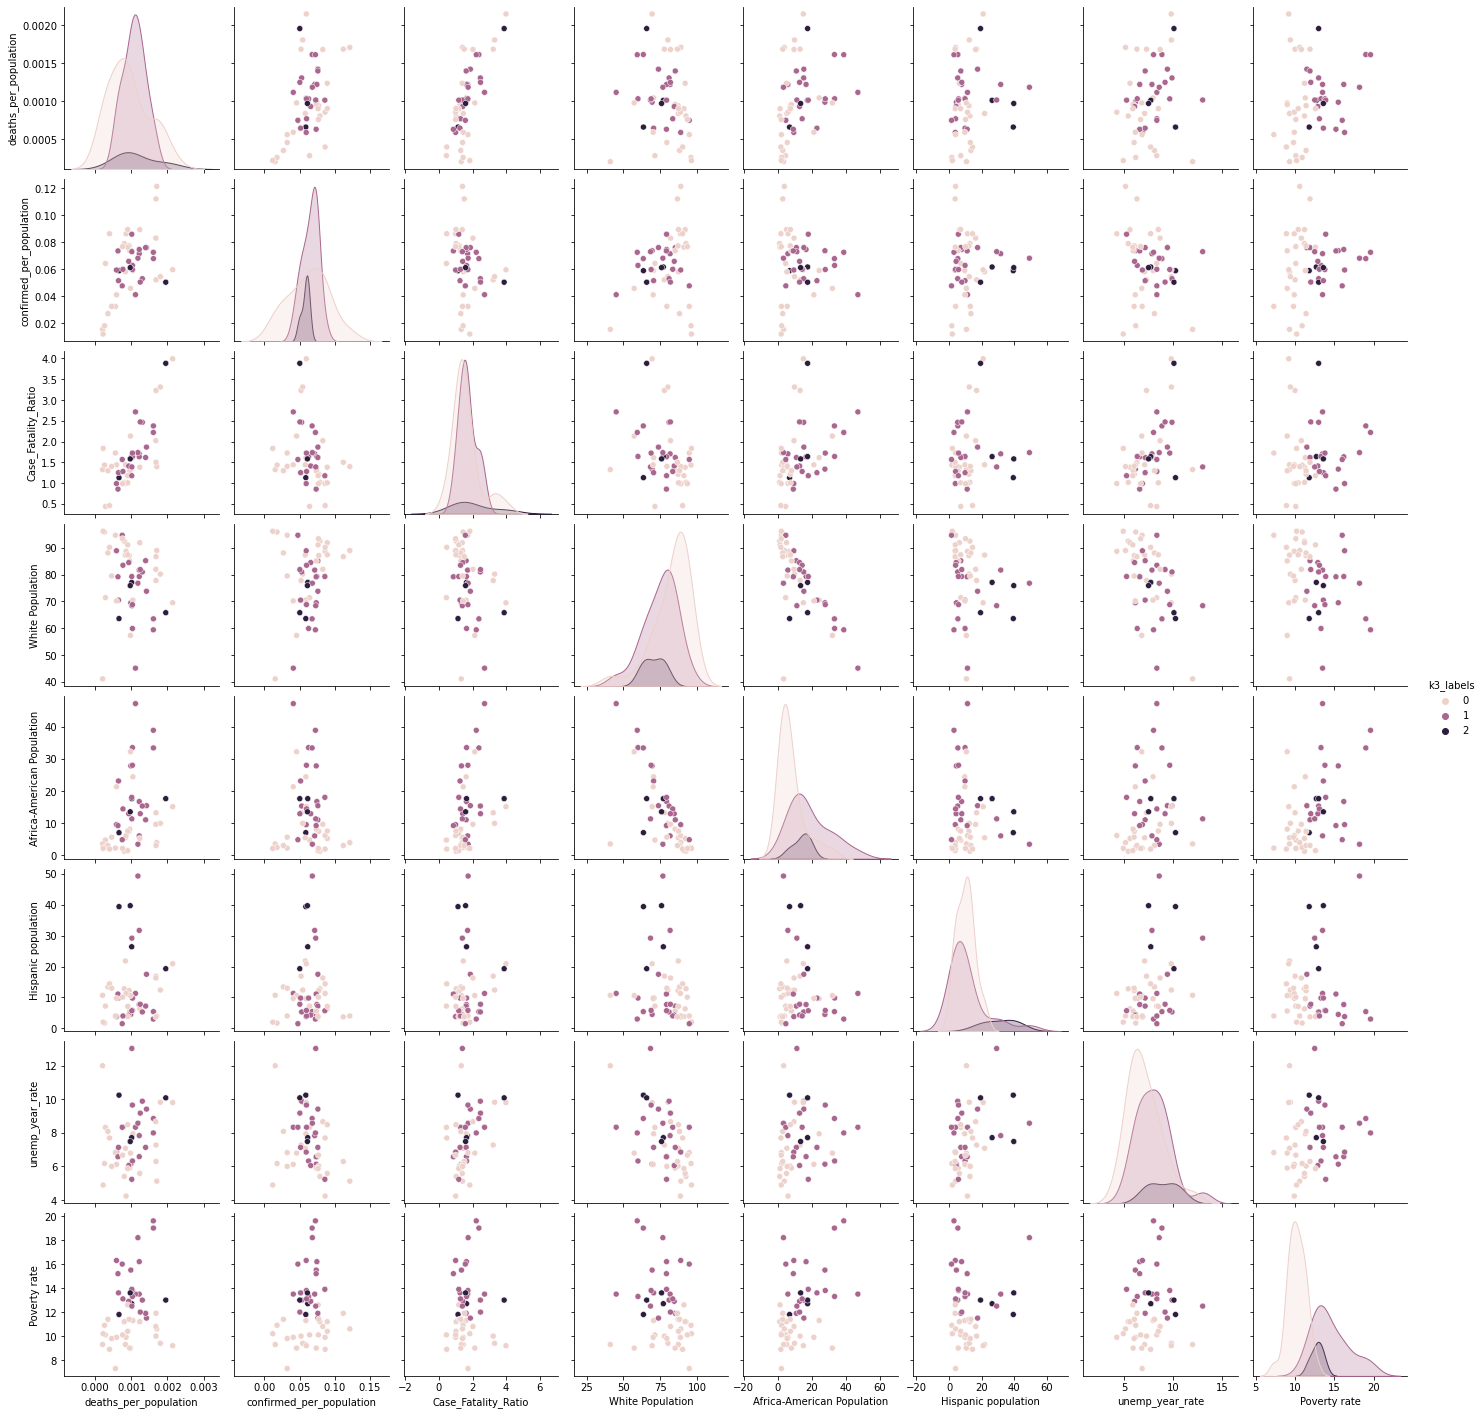

In [142]:
k3 = df5[['deaths_per_population','confirmed_per_population',
       'Case_Fatality_Ratio', 'White Population', 'Africa-American Population',
       'Hispanic population', 'unemp_year_rate', 'Poverty rate']]
k3['k3_labels']=k3_labels

sns.pairplot(data=k3, hue='k3_labels');

**Findings:** We elected to separate out into 3 clusters which created clusters containing 26 states, 21 states, and then 4 states. Let's first compare clusters 0 (26 states) and 1 (21 states) since they are the 2 dominant clusters. Do we see similarities to what we discovered through our DBSCAN method? Let's examine the same metrics we've been focusing on previously. We can see that across the clusters we observe increases in both CFR and deaths per capita again, and once more observe the same trend of positively correlation relating to the minority demographics  while simultaneously negatively correlated with the white population demographic. Both models arrive at similar conclusions regarding our statement and highlight the utmost importance of recommending to our agency the need for support for the adversely affected minority communities by this pandemic. 